# Cleaning the NHANES diabetes data

[DSLC stages]: Data cleaning and pre-processing


Start by loading in any libraries that you will use in this document.


In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

import sys
file_path = r"C:\Users\15184\OneDrive\Documents\Statistical Principals for Data Science\diabetesAnalysis"
sys.path.append(file_path)

pd.set_option('display.max_columns', None)


## Domain problem formulation

Write a summary of the problem.





## Data source overview

Briefly describe where the data being used for this project came from


## Step 1: Review background information {#sec-bg-info}

### Information on data collection

Write a summary of how the data was collected.

### Data dictionary

If there is a data dictionary, give some details here.


### Answering questions about the background information

Answer the recommended background information questions from the Data Cleaning chapter.

- *What does each variable measure?* 

- *How was the data collected?* 

- *What are the observational units?* 

- *Is the data relevant to my project?*




## Step 2: Loading in the data


Load in the data. 


In [29]:

diabetes_orig = pd.read_csv(file_path + "\data\samadult.csv")


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\15184\AppData\Local\Temp\ipykernel_26704\1919117959.py:1: SyntaxWarning: invalid escape sequence '\d'
  diabetes_orig = pd.read_csv(file_path + "\data\samadult.csv")


Let's look at the first few rows to make sure it looks like it has been loaded in correctly:

In [30]:
diabetes_orig.head()

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,RECTYPE,SRVY_YR,INTV_MON,REGION,PSTRAT,PPSU,PROX1,PROX2,LATEINTA,PROXYSA,PAR_STAT,FDRN_FLG,DOINGLWA,WHYNOWKA,EVERWRK,SUPERVIS,WRKCATA,BUSINC1A,LOCALL1B,WRKLONGH,HOURPDA,PDSICKA,ONEJOB,WRKLYR4,INDSTRN1,INDSTRN2,OCCUPN1,OCCUPN2,YRSWRKPA,DIFAGE2,HYPEV,HYPDIFV,HYPMDEV2,HYPMED2,CHLEV,CHLYR,CHLMDEV2,CHLMDNW2,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,ASPMEDEV,ASPMEDAD,ASPMDMED,ASPONOWN,AASMEV,AASSTILL,AASMYR,AASERYR1,ULCEV,ULCYR,ULCCOLEV,CANEV,CNKIND1,CNKIND2,CNKIND3,CNKIND4,CNKIND5,CNKIND6,CNKIND7,CNKIND8,CNKIND9,CNKIND10,CNKIND11,CNKIND12,CNKIND13,CNKIND14,CNKIND15,CNKIND16,CNKIND17,CNKIND18,CNKIND19,CNKIND20,CNKIND21,CNKIND22,CNKIND23,CNKIND24,CNKIND25,CNKIND26,CNKIND27,CNKIND28,CNKIND29,CNKIND30,CNKIND31,PREGEVER,DBHVPAY,DBHVCLY,DBHVWLY,DBHVPAN,DBHVCLN,DBHVWLN,DIBREL,DIBEV1,DIBPRE2,DIBTEST,DIBTYPE,DIBPILL1,INSLN1,DIBINS2,DIBINS3,DIBINS4,DIBGDM,DIBBABY,DIBPRGM,DIBREFER,DIBBEGIN,AHAYFYR,SINYR,CBRCHYR,KIDWKYR,LIVYR,JNTSYMP,JMTHP1,JMTHP2,JMTHP3,JMTHP4,JMTHP5,JMTHP6,JMTHP7,JMTHP8,JMTHP9,JMTHP10,JMTHP11,JMTHP12,JMTHP13,JMTHP14,JMTHP15,JMTHP16,JMTHP17,JNTCHR,JNTHP,ARTH1,ARTHLMT,PAINECK,PAINLB,PAINLEG,PAINFACE,AMIGR,ACOLD2W,AINTIL2W,PREGNOW,PREGFLYR,HRAIDNOW,HRAIDEV,AHEARST1,AVISION,ABLIND,VIM_DREV,VIMLS_DR,VIM_CAEV,VIMLS_CA,VIMCSURG,VIM_GLEV,VIMLS_GL,VIM_MDEV,VIMLS_MD,VIMGLASS,VIMREAD,VIMDRIVE,AVISREH,AVISDEV,AVDF_NWS,AVDF_CLS,AVDF_NIT,AVDF_DRV,AVDF_PER,AVDF_CRD,AVISEXAM,AVISACT,AVISPROT,LUPPRT,CHPAIN6M,PAINLMT,HYPYR1,CANAGE1,CANAGE2,CANAGE3,CANAGE4,CANAGE5,CANAGE6,CANAGE7,CANAGE8,CANAGE9,CANAGE10,CANAGE11,CANAGE12,CANAGE13,CANAGE14,CANAGE15,CANAGE16,CANAGE17,CANAGE18,CANAGE19,CANAGE20,CANAGE21,CANAGE22,CANAGE23,CANAGE24,CANAGE25,CANAGE26,CANAGE27,CANAGE28,CANAGE29,CANAGE30,DIBAGE1,ACHRC14A,ADURA14A,ADURB14A,AFLHC19_,AFLHC20_,AFLHC21_,AFLHC22_,AFLHC23_,AFLHC24_,AFLHC25_,AFLHC26_,AFLHC27_,AFLHC28_,AFLHC29_,AFLHC30_,AFLHC31_,AFLHC32_,AFLHC33_,AFLHC34_,AFLHCA1,AFLHCA10,AFLHCA11,AFLHCA12,AFLHCA13,AFLHCA15,AFLHCA16,AFLHCA17,AFLHCA18,AFLHCA2,AFLHCA3,AFLHCA4,AFLHCA5,AFLHCA6,AFLHCA7,AFLHCA8,AFLHCA9,AFLHCA90,AFLHCA91,AHSTATYR,ALCHRC1,ALCHRC10,ALCHRC11,ALCHRC12,ALCHRC13,ALCHRC15,ALCHRC16,ALCHRC17,ALCHRC18,ALCHRC19,ALCHRC2,ALCHRC20,ALCHRC21,ALCHRC22,ALCHRC23,ALCHRC24,ALCHRC25,ALCHRC26,ALCHRC27,ALCHRC28,ALCHRC29,ALCHRC3,ALCHRC30,ALCHRC31,ALCHRC32,ALCHRC33,ALCHRC34,ALCHRC4,ALCHRC5,ALCHRC6,ALCHRC7,ALCHRC8,ALCHRC9,ALCHRC90,ALCHRC91,ALCHRONR,ALCNDRT,ALDURA1,ALDURA10,ALDURA11,ALDURA12,ALDURA13,ALDURA15,ALDURA16,ALDURA17,ALDURA18,ALDURA19,ALDURA2,ALDURA20,ALDURA21,ALDURA22,ALDURA23,ALDURA24,ALDURA25,ALDURA26,ALDURA27,ALDURA28,ALDURA29,ALDURA3,ALDURA30,ALDURA31,ALDURA32,ALDURA33,ALDURA34,ALDURA4,ALDURA5,ALDURA6,ALDURA7,ALDURA8,ALDURA9,ALDURA90,ALDURA91,ALDURB1,ALDURB10,ALDURB11,ALDURB12,ALDURB13,ALDURB15,ALDURB16,ALDURB17,ALDURB18,ALDURB19,ALDURB2,ALDURB20,ALDURB21,ALDURB22,ALDURB23,ALDURB24,ALDURB25,ALDURB26,ALDURB27,ALDURB28,ALDURB29,ALDURB3,ALDURB30,ALDURB31,ALDURB32,ALDURB33,ALDURB34,ALDURB4,ALDURB5,ALDURB6,ALDURB7,ALDURB8,ALDURB9,ALDURB90,ALDURB91,ALHCA14A,ALTIME1,ALTIME10,ALTIME11,ALTIME12,ALTIME13,ALTIME15,ALTIME16,ALTIME17,ALTIME18,ALTIME19,ALTIME2,ALTIME20,ALTIME21,ALTIME22,ALTIME23,ALTIME24,ALTIME25,ALTIME26,ALTIME27,ALTIME28,ALTIME29,ALTIME3,ALTIME30,ALTIME31,ALTIME32,ALTIME33,ALTIME34,ALTIME4,ALTIME5,ALTIME6,ALTIME7,ALTIME8,ALTIME9,ALTIME90,ALTIME91,ALUNIT1,ALUNIT10,ALUNIT11,ALUNIT12,ALUNIT13,ALUNIT15,ALUNIT16,ALUNIT17,ALUNIT18,ALUNIT19,ALUNIT2,ALUNIT20,ALUNIT21,ALUNIT22,ALUNIT23,ALUNIT24,ALUNIT25,ALUNIT26,ALUNIT27,ALUNIT28,ALUNIT29,ALUNIT3,ALUNIT30,ALUNIT31,ALUNIT32,ALUNIT33,ALUNIT34,ALUNIT4,ALUNIT5,ALUNIT6,ALUNIT7,ALUNIT8,ALUNIT9,ALUNIT90,ALUNIT91,ATIME14A,AUNIT14A,BEDDAYR,FLA1AR,FLCARRY,FLCLIMB,FLGRASP,FLPUSH,FLREACH,FLRELAX,FLSHOP,FLSIT,FLSOCL,FLSTAND,FLSTOOP,FLWALK,SPECEQ,WKDAYR,SMKEV,SMKREG,SMKNOW,SMKQTNO,SMKQTTP,CIGSDA1,CIGDAMO,CIGSDA2,CIGQTYR,ECIGEV2,ECIGCUR2,ECIG30D2,CIGAREV2,CIGCUR2,CIG30D2,PIPEV2,PIPECUR2,SMKLSTB1,SMKLSCR2,VIGNO,VIGTP,VIGLNG

And let's examine the dimension of the data.


In [31]:
diabetes_orig.shape

(33028, 805)

In [32]:
import sys
import os
import importlib

# Add the directory containing the file to the Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(file_path), 'dslc_documentation/functions')))

# Import the function
from dslc_documentation.functions import load_diabetes_data

# Reload the module to reflect any updates
importlib.reload(load_diabetes_data)

diabetes_data = load_diabetes_data.load_diabetes_data(file_path+"\data\samadult.csv")

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\15184\AppData\Local\Temp\ipykernel_26704\4166553525.py:14: SyntaxWarning: invalid escape sequence '\d'
  diabetes_data = load_diabetes_data.load_diabetes_data(file_path+"\data\samadult.csv")


In [33]:
diabetes_data.head(10)

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region,marital_status
0,10201,2,24,2,2,2,125,2019,66,2,2,2,2,1,95,95,1.0,NaN,2,5
1,20101,2,76,2,1,2,190,2727,70,1,2,2,2,1,1,95,NaN,1.0,3,5
2,30102,2,36,2,2,2,225,3862,64,2,2,2,1,1,95,21,2.0,NaN,4,2
3,50101,2,35,1,2,2,240,3995,65,2,2,2,1,1,95,95,1.0,NaN,3,7
4,100105,2,20,2,2,2,103,1883,62,2,2,2,1,2,3,95,NaN,NaN,3,7
5,130101,2,19,2,2,2,115,1974,64,2,2,2,9,2,95,4,5.0,NaN,3,7
6,150101,2,45,1,2,2,172,2615,68,2,2,2,1,2,3,7,1.0,NaN,2,7
7,190101,2,18,2,2,2,130,2037,67,2,2,2,2,2,7,3,1.0,NaN,4,7
8,230101,2,20,2,2,2,130,2305,63,2,2,2,2,2,5,5,NaN,NaN,4,7
9,250101,2,73,1,1,2,142,2363,65,2,1,1,2,2,3,95,7.0,NaN,2,1




## Step 3: Examine the data

In this section we explore the common messy data traits to identify any cleaning action items.





### Finding invalid values



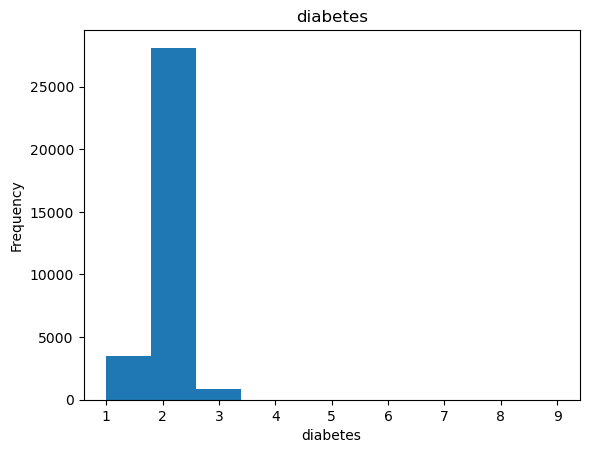

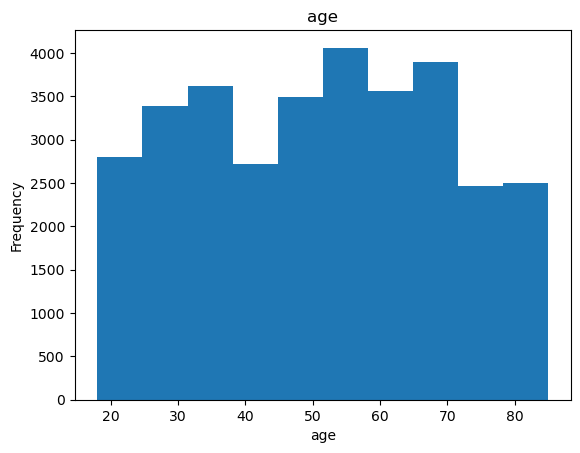

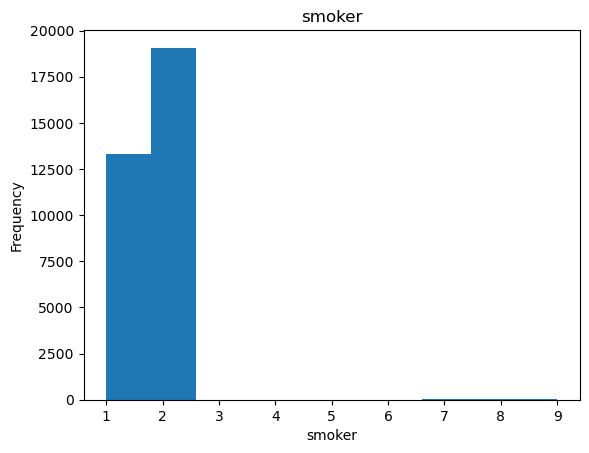

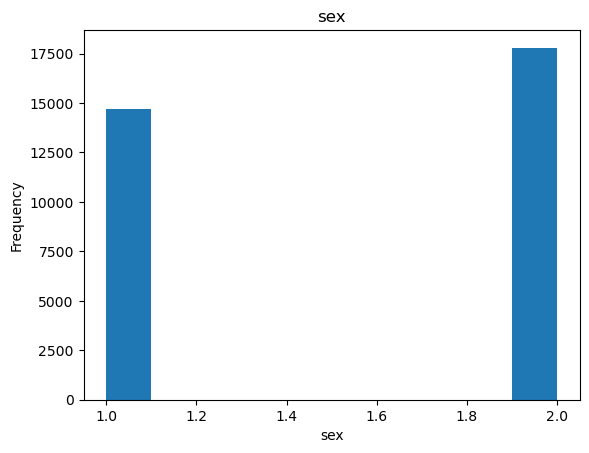

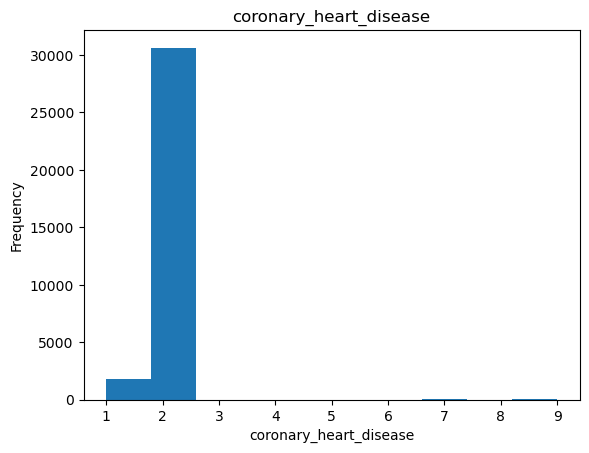

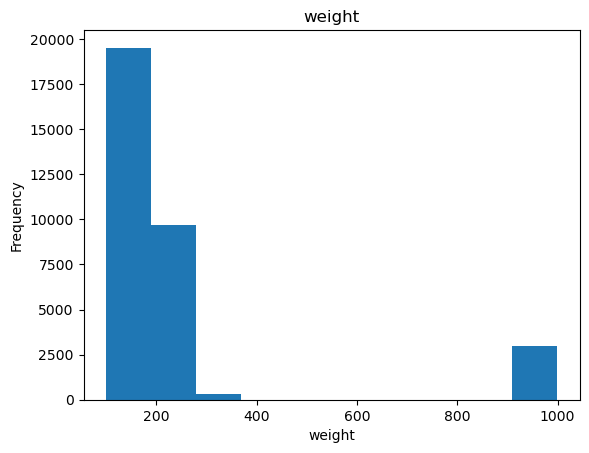

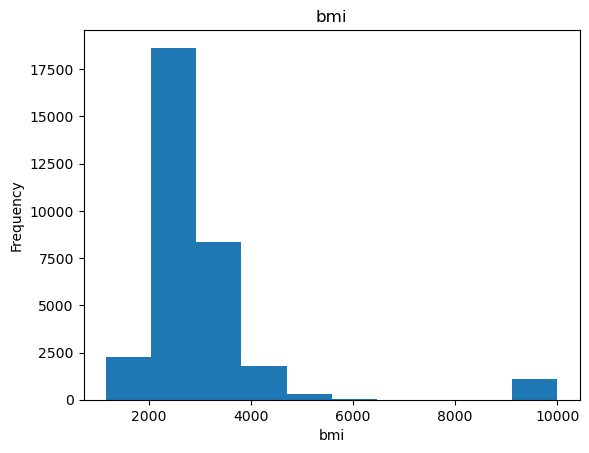

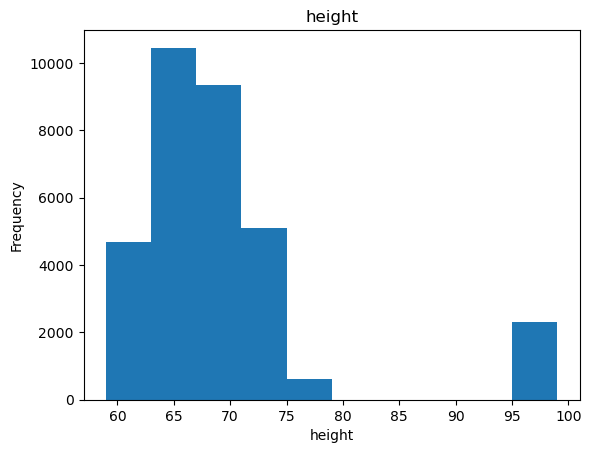

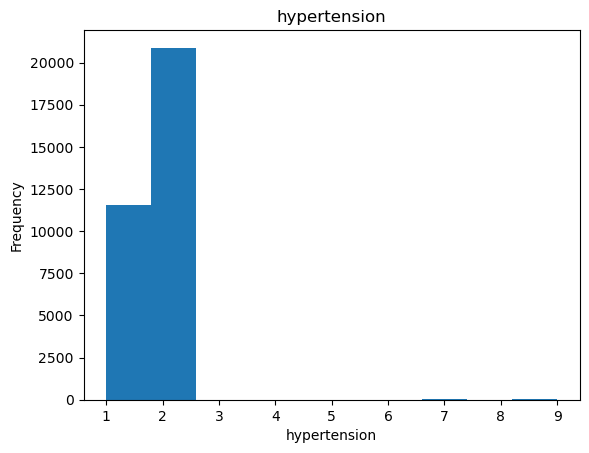

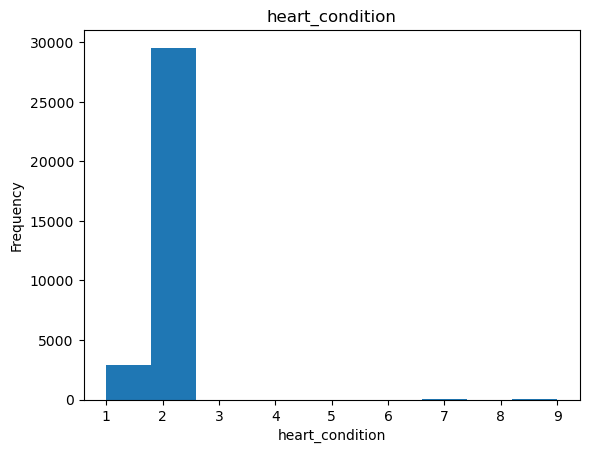

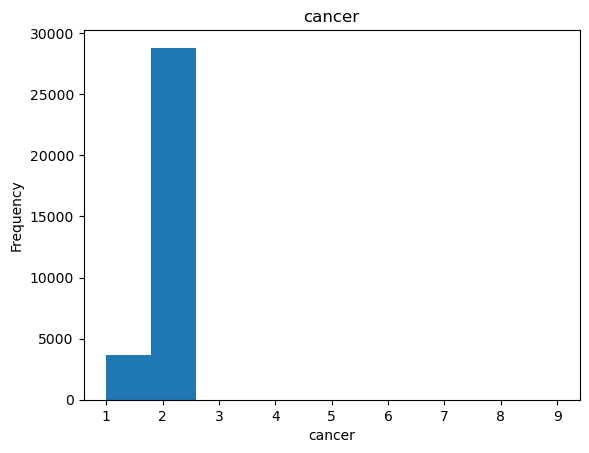

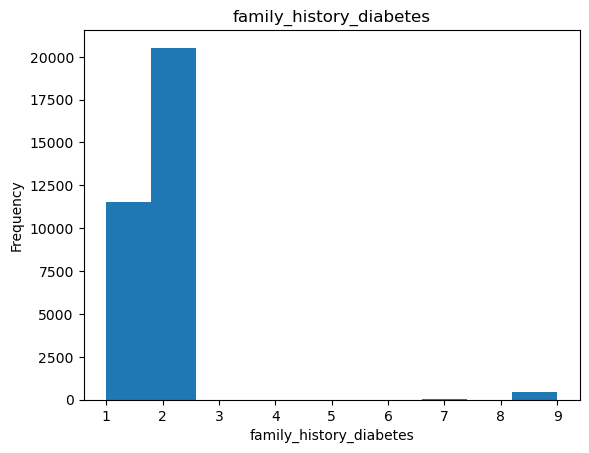

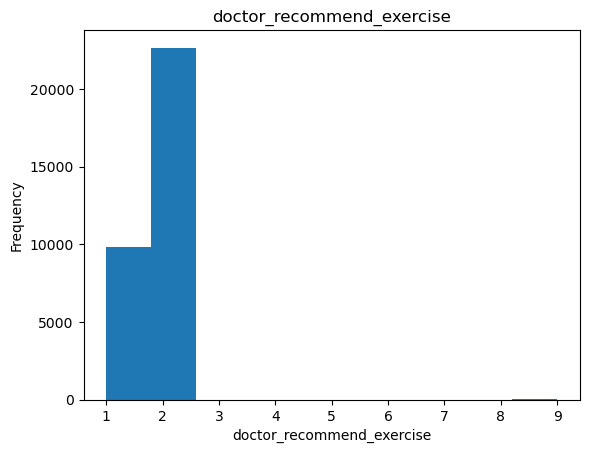

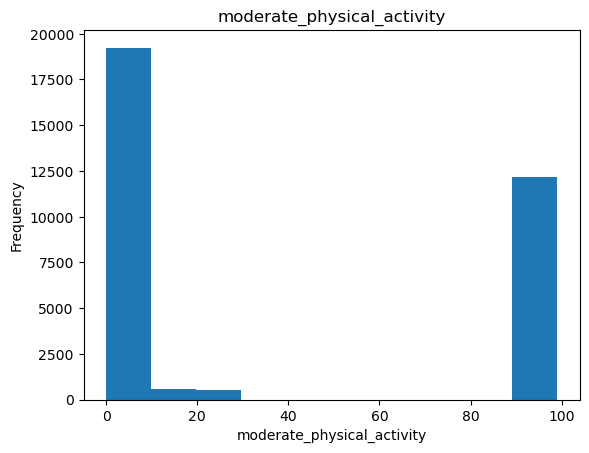

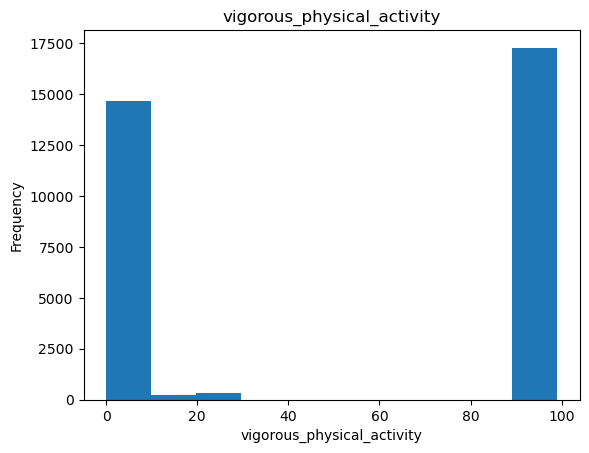

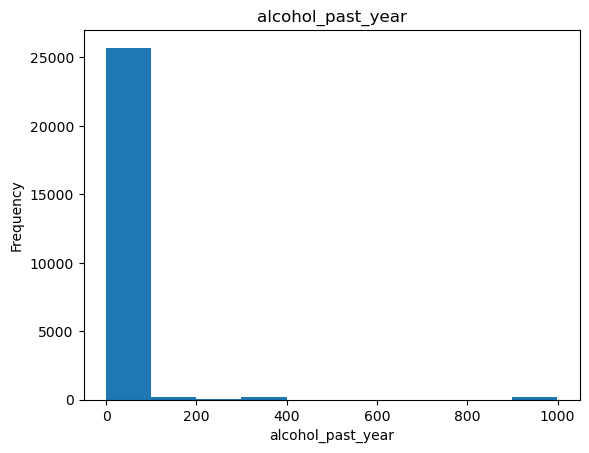

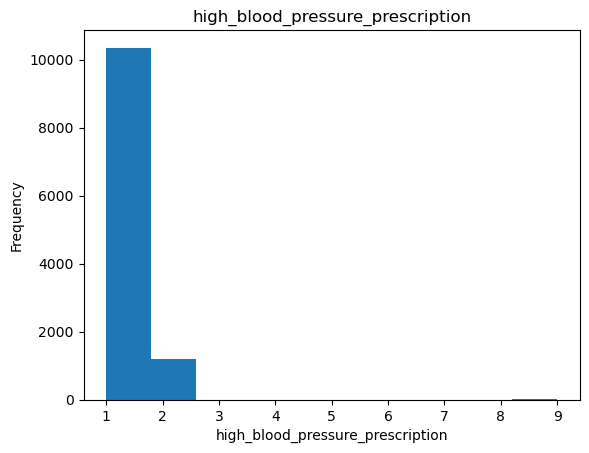

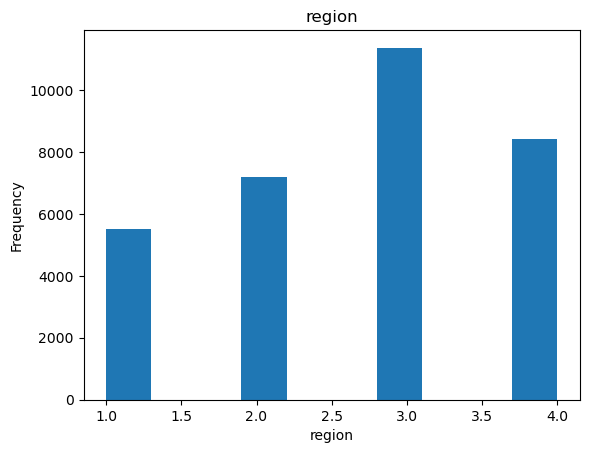

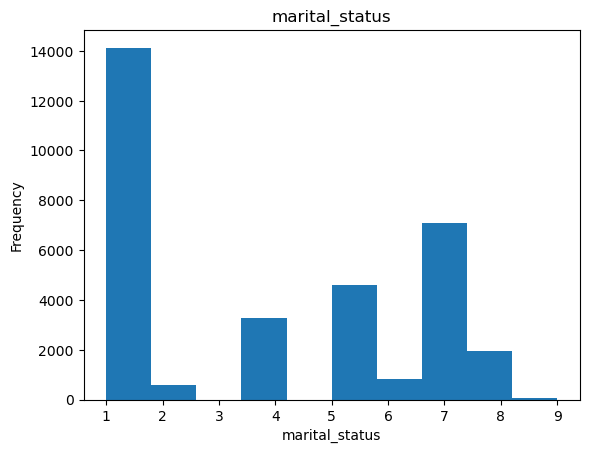

In [34]:
for i in range(1,len(diabetes_data.columns)):
    plt.hist(diabetes_data[diabetes_data.columns[i]])
    plt.title(diabetes_data.columns[i])
    plt.xlabel(diabetes_data.columns[i])
    plt.ylabel("Frequency")
    plt.show()

In [35]:
diabetes_data.describe()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region,marital_status
count,3.249900e+04,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.00000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,26336.000000,11571.000000,32499.000000,32499.000000
mean,3.569249e+08,1.925628,51.051017,1.608942,1.547494,1.959722,251.113850,3045.910736,68.817748,1.65322,1.918613,1.892551,1.742484,1.701714,38.722576,52.416413,15.294122,1.111658,2.698329,3.755408
std,2.057800e+08,0.404497,18.511120,0.609761,0.497747,0.391627,240.280025,1451.552127,8.459210,0.54237,0.367779,0.366062,0.977843,0.487912,43.838695,45.537778,96.447840,0.387548,1.033449,2.670598
min,1.020100e+04,1.000000,18.000000,1.000000,1.000000,1.000000,100.000000,1167.000000,59.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.797701e+08,2.000000,35.000000,1.000000,1.000000,2.000000,150.000000,2374.000000,64.000000,1.00000,2.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000
50%,3.554401e+08,2.000000,52.000000,2.000000,2.000000,2.000000,176.000000,2724.000000,67.000000,2.00000,2.000000,2.000000,2.000000,2.000000,7.000000,95.000000,2.000000,1.000000,3.000000,4.000000
75%,5.341951e+08,2.000000,66.000000,2.000000,2.000000,2.000000,214.000000,3173.000000,70.000000,2.00000,2.000000,2.000000,2.000000,2.000000,95.000000,95.000000,4.000000,1.000000,4.000000,7.000000
max,7.157901e+08,9.000000,85.000000,9.000000,2.000000,9.000000,999.000000,9999.000000,99.000000,9.00000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000,999.000000,9.000000,4.000000,9.000000


#### Numeric variables



In [36]:
num_columns = diabetes_data.select_dtypes(include=[np.number]).columns
print("Columns with Number data-types: ",num_columns)

continuos_columns = ['age', 'bmi', 'weight', 'height', 'alcohol_past_year']
print("\nContinuos data types columns: ", continuos_columns)

Columns with Number data-types:  Index(['house_family_person_id', 'diabetes', 'age', 'smoker', 'sex',
       'coronary_heart_disease', 'weight', 'bmi', 'height', 'hypertension',
       'heart_condition', 'cancer', 'family_history_diabetes',
       'doctor_recommend_exercise', 'moderate_physical_activity',
       'vigorous_physical_activity', 'alcohol_past_year',
       'high_blood_pressure_prescription', 'region', 'marital_status'],
      dtype='object')

Continuos data types columns:  ['age', 'bmi', 'weight', 'height', 'alcohol_past_year']


#### Categorical variables




In [37]:
object_columns = diabetes_data.columns.difference(num_columns)
print("Columns with Object data-types: ", object_columns)

cat_columns = ["diabetes", "smoker", "sex", "coronary_heart_disease", "hypertension",
    "heart_condition", "cancer", "family_history_diabetes", "doctor_recommended_exercise",
    "moderate_physical_activity", "vigorous_physical_activity",
    "high_blood_pressure_prescription", "region", "marital_status"]

print("\nColumns with Categorical data: ", cat_columns)

Columns with Object data-types:  Index([], dtype='object')

Columns with Categorical data:  ['diabetes', 'smoker', 'sex', 'coronary_heart_disease', 'hypertension', 'heart_condition', 'cancer', 'family_history_diabetes', 'doctor_recommended_exercise', 'moderate_physical_activity', 'vigorous_physical_activity', 'high_blood_pressure_prescription', 'region', 'marital_status']


### Examining missing values




In [38]:
# Identify columns with missing values
missing_values = diabetes_data.isnull().sum()
columns_with_missing = missing_values[missing_values > 0].index

print("Number of Missing Values for Each Column:")
print(missing_values)
print("\n")

# Print missing values for each column
for col in columns_with_missing:
    print(f"Missing values in column '{col}':")
    print(diabetes_data[diabetes_data[col].isnull()])
    print("\n")

Number of Missing Values for Each Column:
house_family_person_id                  0
diabetes                                0
age                                     0
smoker                                  0
sex                                     0
coronary_heart_disease                  0
weight                                  0
bmi                                     0
height                                  0
hypertension                            0
heart_condition                         0
cancer                                  0
family_history_diabetes                 0
doctor_recommend_exercise               0
moderate_physical_activity              0
vigorous_physical_activity              0
alcohol_past_year                    6163
high_blood_pressure_prescription    20928
region                                  0
marital_status                          0
dtype: int64


Missing values in column 'alcohol_past_year':
       house_family_person_id  diabetes  age  smoker  sex

### Examining the data format



Currently all data is numeric although some data is categorical so we will need to convert these.

In [39]:
diabetes_data.dtypes

house_family_person_id                int64
diabetes                              int64
age                                   int64
smoker                                int64
sex                                   int64
coronary_heart_disease                int64
weight                                int64
bmi                                   int64
height                                int64
hypertension                          int64
heart_condition                       int64
cancer                                int64
family_history_diabetes               int64
doctor_recommend_exercise             int64
moderate_physical_activity            int64
vigorous_physical_activity            int64
alcohol_past_year                   float64
high_blood_pressure_prescription    float64
region                                int64
marital_status                        int64
dtype: object

### Assessing column names



Columns names were updated as a part of importing the data to ensure they were clear to the reader.

In [40]:
diabetes_data.head()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region,marital_status
0,10201,2,24,2,2,2,125,2019,66,2,2,2,2,1,95,95,1.0,NaN,2,5
1,20101,2,76,2,1,2,190,2727,70,1,2,2,2,1,1,95,NaN,1.0,3,5
2,30102,2,36,2,2,2,225,3862,64,2,2,2,1,1,95,21,2.0,NaN,4,2
3,50101,2,35,1,2,2,240,3995,65,2,2,2,1,1,95,95,1.0,NaN,3,7
4,100105,2,20,2,2,2,103,1883,62,2,2,2,1,2,3,95,NaN,NaN,3,7


### Assessing variable type



### Evaluating data completeness





### Answering any unanswered questions







## Step 4: Prepare the data

Don't forget to split the data into training, validation and test sets before you clean and pre-process it!

In [41]:
from dslc_documentation.functions import prepare_data

# Reload the module to reflect any updates
importlib.reload(prepare_data)

diabetes_processed = prepare_data.num_unique_cols(diabetes_data, ["diabetes", "sex", "smoker", "coronary_heart_disease",
     "hypertension", "heart_condition", "cancer", "family_history_diabetes", "doctor_recommend_exercise",
     "high_blood_pressure_prescription"], 2)

diabetes_processed = prepare_data.num_unique_cols(diabetes_processed, ["region"], 4)

In [42]:
diabetes_processed.describe()
#diabetes_data.describe()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region,marital_status
count,3.249900e+04,31588.000000,32499.000000,32396.000000,32499.000000,32425.000000,32499.000000,32499.000000,32499.000000,32450.000000,32456.000000,32469.000000,32043.000000,32480.000000,32499.000000,32499.000000,26336.000000,11560.000000,32499.000000,32499.000000
mean,3.569249e+08,0.110232,51.051017,0.411316,0.547494,0.055359,251.113850,3045.910736,68.817748,0.356579,0.089721,0.112969,0.359174,0.302248,38.722576,52.416413,15.294122,0.895675,1.698329,3.755408
std,2.057800e+08,0.313183,18.511120,0.492080,0.497747,0.228682,240.280025,1451.552127,8.459210,0.478996,0.285787,0.316560,0.479766,0.459239,43.838695,45.537778,96.447840,0.305695,1.033449,2.670598
min,1.020100e+04,0.000000,18.000000,0.000000,0.000000,0.000000,100.000000,1167.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.797701e+08,0.000000,35.000000,0.000000,0.000000,0.000000,150.000000,2374.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,3.554401e+08,0.000000,52.000000,0.000000,1.000000,0.000000,176.000000,2724.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,95.000000,2.000000,1.000000,2.000000,4.000000
75%,5.341951e+08,0.000000,66.000000,1.000000,1.000000,0.000000,214.000000,3173.000000,70.000000,1.000000,0.000000,0.000000,1.000000,1.000000,95.000000,95.000000,4.000000,1.000000,3.000000,7.000000
max,7.157901e+08,1.000000,85.000000,1.000000,1.000000,1.000000,999.000000,9999.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,99.000000,999.000000,1.000000,3.000000,9.000000


In [43]:
from dslc_documentation.functions import prepare_data

# Reload the module to reflect any updates
importlib.reload(prepare_data)

diabetes_processed = prepare_data.invalid_to_nan(diabetes_processed, 
    ["alcohol_past_year", "weight"], [996,997,998,999])

diabetes_processed = prepare_data.invalid_to_nan(diabetes_processed,
    ["height"], [96,97,98,99])

diabetes_processed = prepare_data.invalid_to_nan(diabetes_processed,
    ["bmi"], [9999])

diabetes_processed = prepare_data.invalid_to_nan(diabetes_processed,
    ["moderate_physical_activity", "vigorous_physical_activity"], [97,98,99])

diabetes_processed["moderate_physical_activity"] = diabetes_processed["moderate_physical_activity"].replace({95:0, 96:0})
diabetes_processed["vigorous_physical_activity"] = diabetes_processed["vigorous_physical_activity"].replace({95:0, 96:0})

Simple impute for region and marital status

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example DataFrame with multiple categories and missing values

# Step 1: Impute missing values with the most frequent category (mode)
cats_simpleImpute = ['region', 'marital_status']
imputer = SimpleImputer(strategy='most_frequent')
diabetes_processed[cats_simpleImpute] = imputer.fit_transform(diabetes_processed[cats_simpleImpute])

from dslc_documentation.functions import prepare_data

# Reload the module to reflect any updates
importlib.reload(prepare_data)

diabetes_processed = prepare_data.categories_oneHot(diabetes_processed, ["region"], True, 
{1: 'Northwest', 2: 'Midwest', 3: 'South', 4: 'West'})

diabetes_processed = prepare_data.categories_oneHot(diabetes_processed, ["marital_status"], True,
    { 0: 'Never_married', 1: 'Married', 2: 'Married', 3: 'Married', 4: 'Widdowed', 5: 'Divorced', 6: 'Separated', 7: 'Never_married', 8: 'Living with partner', 9: np.nan})


print(diabetes_processed.head())


   house_family_person_id  diabetes  age  smoker  sex  coronary_heart_disease  \
0                   10201       0.0   24     0.0    1                     0.0   
1                   20101       0.0   76     0.0    0                     0.0   
2                   30102       0.0   36     0.0    1                     0.0   
3                   50101       0.0   35     1.0    1                     0.0   
4                  100105       0.0   20     0.0    1                     0.0   

   weight     bmi  height  hypertension  heart_condition  cancer  \
0   125.0  2019.0    66.0           0.0              0.0     0.0   
1   190.0  2727.0    70.0           1.0              0.0     0.0   
2   225.0  3862.0    64.0           0.0              0.0     0.0   
3   240.0  3995.0    65.0           0.0              0.0     0.0   
4   103.0  1883.0    62.0           0.0              0.0     0.0   

   family_history_diabetes  doctor_recommend_exercise  \
0                      0.0                     

Impute using KNN Imputer

In [55]:
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the KNNImputer with a specified number of neighbors (e.g., 5)
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the data and transform it
df_imputed = pd.DataFrame(imputer.fit_transform(diabetes_processed), columns=diabetes_processed.columns)

binary_columns = ["diabetes", "sex", "smoker", "coronary_heart_disease",
     "hypertension", "heart_condition", "cancer", "family_history_diabetes", "doctor_recommend_exercise",
     "high_blood_pressure_prescription"]
# Step 2: Round only the binary columns
df_imputed[binary_columns] = df_imputed[binary_columns].round(0)

# Print the imputed dataset
print(df_imputed)


       house_family_person_id  diabetes   age  smoker  sex  \
0                     10201.0       0.0  24.0     0.0  1.0   
1                     20101.0       0.0  76.0     0.0  0.0   
2                     30102.0       0.0  36.0     0.0  1.0   
3                     50101.0       0.0  35.0     1.0  1.0   
4                    100105.0       0.0  20.0     0.0  1.0   
...                       ...       ...   ...     ...  ...   
32494             715590101.0       0.0  56.0     1.0  0.0   
32495             715650101.0       0.0  58.0     1.0  0.0   
32496             715690101.0       1.0  71.0     1.0  1.0   
32497             715760101.0       0.0  64.0     1.0  0.0   
32498             715790101.0       0.0  54.0     0.0  0.0   

       coronary_heart_disease  weight     bmi  height  hypertension  \
0                         0.0   125.0  2019.0    66.0           0.0   
1                         0.0   190.0  2727.0    70.0           1.0   
2                         0.0   225.0  386

In [56]:
df_imputed["diabetes"].value_counts()

diabetes
0.0    29005
1.0     3494
Name: count, dtype: int64

Use SMOTE to get more diabetes patients

In [57]:
from imblearn.over_sampling import SMOTE

X = df_imputed.drop(columns=['diabetes'])
y = df_imputed['diabetes']
# Assume X contains your features and y contains the target variable
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame if needed
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['target'] = y_resampled


In [59]:
df_resampled.describe()

,house_family_person_id,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region_Midwest,region_Northwest,region_South,marital_status_Divorced,marital_status_Living with partner,marital_status_Married,marital_status_Never_married,marital_status_Separated,marital_status_Widdowed,target
count,5.801000e+04,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000,58010.000000
mean,3.578610e+08,56.359537,0.450617,0.534838,0.102899,182.890302,2962.314734,66.615312,0.531957,0.131368,0.146589,0.505140,0.425457,2.873115,1.563066,6.068451,0.964931,0.368644,0.224438,0.238825,0.161402,0.048631,0.442928,0.177925,0.029577,0.137537,0.500000
std,2.052616e+08,16.781551,0.459611,0.460192,0.269506,36.291814,635.359942,3.489768,0.471362,0.304284,0.320150,0.467674,0.457172,3.645420,2.924890,25.930422,0.173730,0.444999,0.385039,0.396293,0.336334,0.202890,0.458839,0.360318,0.154079,0.311170,0.500004
min,1.020100e+04,18.000000,0.000000,0.000000,0.000000,100.000000,1167.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.818826e+08,45.000000,0.000000,0.000000,0.000000,158.000000,2517.498959,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.582951e+08,59.096282,0.272904,0.657356,0.000000,180.000000,2873.765222,66.438629,0.704878,0.000000,0.000000,0.528072,0.150607,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237701,0.000000,0.000000,0.000000,0.500000
75%,5.355610e+08,68.976415,1.000000,1.000000,0.000000,205.000000,3304.309932,69.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.841057,2.193557,3.745436,1.000000,1.000000,0.333157,0.425184,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,7.157901e+08,85.000000,1.000000,1.000000,1.000000,299.000000,9412.000000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,28.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df_resampled["target"].value_counts()

target
0.0    29005
1.0    29005
Name: count, dtype: int64

Stop

In [18]:
from dslc_documentation.functions import prepare_data

# Reload the module to reflect any updates
importlib.reload(prepare_data)

diabetes_processed = prepare_data.categories_oneHot(diabetes_processed, ["region"], True, 
{1: 'Northwest', 2: 'Midwest', 3: 'South', 4: 'West'})

diabetes_processed = prepare_data.categories_oneHot(diabetes_processed, ["marital_status"], True,
    { 0: 'Never_married', 1: 'Married', 2: 'Married', 3: 'Married', 4: 'Widdowed', 5: 'Divorced', 6: 'Separated', 7: 'Never_married', 8: 'Living with partner', 9: np.nan})



In [19]:
diabetes_processed.head()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region_Midwest,region_Northwest,region_South,marital_status_Divorced,marital_status_Living with partner,marital_status_Married,marital_status_Never_married,marital_status_Separated,marital_status_Widdowed
0,10201,0.0,24,0.0,1,0.0,125.0,2019.0,66.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,False,True,False,True,False,False,False,False,False
1,20101,0.0,76,0.0,0,0.0,190.0,2727.0,70.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,1.0,True,False,False,True,False,False,False,False,False
2,30102,0.0,36,0.0,1,0.0,225.0,3862.0,64.0,0.0,0.0,0.0,1.0,1.0,0.0,21.0,2.0,NaN,False,False,True,False,False,True,False,False,False
3,50101,0.0,35,1.0,1,0.0,240.0,3995.0,65.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,True,False,False,False,False,False,True,False,False
4,100105,0.0,20,0.0,1,0.0,103.0,1883.0,62.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,NaN,NaN,True,False,False,False,False,False,True,False,False


In [20]:
# Identify columns with missing values
missing_values = diabetes_processed.isnull().sum()
columns_with_missing = missing_values[missing_values > 0].index

print("Number of Missing Values for Each Column:")
print(missing_values)
print("\n")
print(diabetes_processed.shape)


Number of Missing Values for Each Column:
house_family_person_id                    0
diabetes                                911
age                                       0
smoker                                  103
sex                                       0
coronary_heart_disease                   74
weight                                 2991
bmi                                    1117
height                                 2295
hypertension                             49
heart_condition                          43
cancer                                   30
family_history_diabetes                 456
doctor_recommend_exercise                19
moderate_physical_activity              589
vigorous_physical_activity              360
alcohol_past_year                      6384
high_blood_pressure_prescription      20939
region_Midwest                            0
region_Northwest                          0
region_South                              0
marital_status_Divorced           

In [21]:
from dslc_documentation.functions import prepare_data

# Reload the module to reflect any updates
importlib.reload(prepare_data)

diabetes_processed = prepare_data.impute_val(diabetes_processed, ["weight", "height", "moderate_physical_activity", 
    "vigorous_physical_activity", "alcohol_past_year"], ["height", "weight"])

diabetes_processed = prepare_data.fill_missing(diabetes_processed,["diabetes", "smoker", "coronary_heart_disease", "hypertension",
    "heart_condition", "cancer", "family_history_diabetes", "doctor_recommend_exercise",
    "high_blood_pressure_prescription"], [diabetes_processed["diabetes"].min(), diabetes_processed["smoker"].min(), diabetes_processed["coronary_heart_disease"].min(),
    diabetes_processed["hypertension"].min(), diabetes_processed["heart_condition"].min(), diabetes_processed["cancer"].min(), diabetes_processed["family_history_diabetes"].min(),
    diabetes_processed["doctor_recommend_exercise"].min(), diabetes_processed["high_blood_pressure_prescription"].min()])

diabetes_processed = prepare_data.fill_BMI(diabetes_processed)


In [22]:
diabetes_processed.head()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region_Midwest,region_Northwest,region_South,marital_status_Divorced,marital_status_Living with partner,marital_status_Married,marital_status_Never_married,marital_status_Separated,marital_status_Widdowed
0,10201,0.0,24,0.0,1,0.0,125.0,2019.0,66.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,False,True,False,True,False,False,False,False,False
1,20101,0.0,76,0.0,0,0.0,190.0,2727.0,70.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,6.972659,1.0,True,False,False,True,False,False,False,False,False
2,30102,0.0,36,0.0,1,0.0,225.0,3862.0,64.0,0.0,0.0,0.0,1.0,1.0,0.0,21.0,2.000000,0.0,False,False,True,False,False,True,False,False,False
3,50101,0.0,35,1.0,1,0.0,240.0,3995.0,65.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.0,True,False,False,False,False,False,True,False,False
4,100105,0.0,20,0.0,1,0.0,103.0,1883.0,62.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,6.972659,0.0,True,False,False,False,False,False,True,False,False


In [23]:
diabetes_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32499 entries, 0 to 32498
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   house_family_person_id              32499 non-null  int64  
 1   diabetes                            32499 non-null  float64
 2   age                                 32499 non-null  int64  
 3   smoker                              32499 non-null  float64
 4   sex                                 32499 non-null  int64  
 5   coronary_heart_disease              32499 non-null  float64
 6   weight                              32499 non-null  float64
 7   bmi                                 32499 non-null  float64
 8   height                              32499 non-null  float64
 9   hypertension                        32499 non-null  float64
 10  heart_condition                     32499 non-null  float64
 11  cancer                              32499

In [24]:
diabetes_processed = diabetes_processed.astype(int)

In [25]:
diabetes_processed.describe()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region_Midwest,region_Northwest,region_South,marital_status_Divorced,marital_status_Living with partner,marital_status_Married,marital_status_Never_married,marital_status_Separated,marital_status_Widdowed
count,3.249900e+04,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000
mean,3.569249e+08,0.107142,51.051017,0.410013,0.547494,0.055232,175.313056,2715.695129,66.675928,0.356042,0.089603,0.112865,0.354134,0.302071,3.105388,1.889597,6.781593,0.318594,0.349642,0.221699,0.259116,0.141851,0.059540,0.452383,0.217576,0.025970,0.100618
std,2.057800e+08,0.309298,18.511120,0.491843,0.497747,0.228437,37.430102,760.566424,3.760005,0.478835,0.285616,0.316433,0.478257,0.459163,3.970939,3.291086,30.117604,0.465939,0.476864,0.415396,0.438156,0.348902,0.236637,0.497735,0.412604,0.159048,0.300828
min,1.020100e+04,0.000000,18.000000,0.000000,0.000000,0.000000,100.000000,259.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.797701e+08,0.000000,35.000000,0.000000,0.000000,0.000000,150.000000,2320.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.554401e+08,0.000000,52.000000,0.000000,1.000000,0.000000,175.000000,2659.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.341951e+08,0.000000,66.000000,1.000000,1.000000,0.000000,198.000000,3086.000000,69.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,6.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,7.157901e+08,1.000000,85.000000,1.000000,1.000000,1.000000,299.000000,9412.000000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,28.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


start

In [26]:
from dslc_documentation.functions import prepare_data

# Reload the module to reflect any updates
importlib.reload(prepare_data)

train_data, val_data, test_data = prepare_data.split_data(diabetes_processed, 0.6, 0.2, 0.2)

In [27]:
# Save the datasets to CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)